In [38]:
import pandas as pd
import numpy as np
import nltk
# Apply text pre-processing to DataFrame
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

from textblob import TextBlob, Word
import gensim
from gensim import corpora, models, similarities
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# Fetch stopwords

# import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

# stop=set(stopwords.words('english')) #for english
stop=set(stopwords.words('indonesian'))


[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/gitpod/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
samples= pd.read_csv('hasil/samples_clean_content_textblob_vader.csv', encoding='ISO-8859-1')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]

In [17]:
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['clean_content']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

In [18]:
#buat corpus untuk LDA
corpus=preprocess_news(samples)

In [42]:
len(corpus)

5830

## WORD2VEC

In [52]:
import re

In [53]:
def get_good_tokens(sentence):
    replaced_punctation = list(map(lambda token: re.sub('[^0-9A-Za-z!?]+', '', token), sentence))
    removed_punctation = list(filter(lambda token: token, replaced_punctation))
    return removed_punctation

In [58]:
# Here we get transform the documents into sentences for the word2vecmodel
# we made a function such that later on when we make the submission, we don't need to write duplicate code
def w2v_preprocessing(df):
    """ All the preprocessing steps for word2vec are done in this function.
    All mutations are done on the dataframe itself. So this function returns
    nothing.
    """
    df['clean_content'] = df.clean_content.str.lower()
    df['document_sentences'] = df.clean_content.str.split('.')  # split texts into individual sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(nltk.word_tokenize, sentences)),
                                         df.document_sentences))  # tokenize sentences
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(get_good_tokens, sentences)),
                                         df.tokenized_sentences))  # remove unwanted characters
    df['tokenized_sentences'] = list(map(lambda sentences:
                                         list(filter(lambda lst: lst, sentences)),
                                         df.tokenized_sentences))  # remove empty lists
    return df

w2v_preprocessing(samples)

,ï»¿likes,replies,quotes,retweets,searchQuery,clean_content,textblob_sentiment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,textblob_sentiment_assessment,vader_sentiment,document_sentences,tokenized_sentences
0,0,0,0,0,#gibran,result togel november jogjatoto palembang pool...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto palembang poo...,"[[result, togel, november, jogjatoto, palemban..."
1,0,0,0,0,#gibran,result togel november jogjatoto sunda pools co...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto sunda pools c...,"[[result, togel, november, jogjatoto, sunda, p..."
2,0,0,0,0,#gibran,result togel november jogjatoto belarusia pool...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto belarusia poo...,"[[result, togel, november, jogjatoto, belarusi..."
3,0,0,0,0,#gibran,result togel november jogjatoto toto macau sea...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto toto macau se...,"[[result, togel, november, jogjatoto, toto, ma..."
4,0,0,0,0,#cakimin,politik muhaiminiskandar cakimin mahasiswaunis...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[politik muhaiminiskandar cakimin mahasiswauni...,"[[politik, muhaiminiskandar, cakimin, mahasisw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,0,0,0,0,prabowo gibran,jakarta timur pilih prabowo gibran informasi s...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[jakarta timur pilih prabowo gibran informasi ...,"[[jakarta, timur, pilih, prabowo, gibran, info..."
5826,0,0,0,0,prabowo gibran,abu janda sosok getar koalisi prabowo gibran f...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[abu janda sosok getar koalisi prabowo gibran ...,"[[abu, janda, sosok, getar, koalisi, prabowo, ..."
5827,0,0,0,0,prabowo gibran,konflik prabowo gibran kerja sslrrn,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[konflik prabowo gibran kerja sslrrn],"[[konflik, prabowo, gibran, kerja, sslrrn]]"
5828,0,0,0,0,prabowo gibran,prabowo gibran indonesia sejahtera program swa...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[prabowo gibran indonesia sejahtera program sw...,"[[prabowo, gibran, indonesia, sejahtera, progr..."


In [63]:
def lda_get_good_tokens(df):
    df['text'] = df.clean_content.str.lower()
    df['tokenized_text'] = list(map(nltk.word_tokenize, df.clean_content))
    df['tokenized_text'] = list(map(get_good_tokens, df.tokenized_text))
    return df

lda_get_good_tokens(samples)

,ï»¿likes,replies,quotes,retweets,searchQuery,clean_content,textblob_sentiment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,textblob_sentiment_assessment,vader_sentiment,document_sentences,tokenized_sentences,text,tokenized_text
0,0,0,0,0,#gibran,result togel november jogjatoto palembang pool...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto palembang poo...,"[[result, togel, november, jogjatoto, palemban...",result togel november jogjatoto palembang pool...,"[result, togel, november, jogjatoto, palembang..."
1,0,0,0,0,#gibran,result togel november jogjatoto sunda pools co...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto sunda pools c...,"[[result, togel, november, jogjatoto, sunda, p...",result togel november jogjatoto sunda pools co...,"[result, togel, november, jogjatoto, sunda, po..."
2,0,0,0,0,#gibran,result togel november jogjatoto belarusia pool...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto belarusia poo...,"[[result, togel, november, jogjatoto, belarusi...",result togel november jogjatoto belarusia pool...,"[result, togel, november, jogjatoto, belarusia..."
3,0,0,0,0,#gibran,result togel november jogjatoto toto macau sea...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[result togel november jogjatoto toto macau se...,"[[result, togel, november, jogjatoto, toto, ma...",result togel november jogjatoto toto macau sea...,"[result, togel, november, jogjatoto, toto, mac..."
4,0,0,0,0,#cakimin,politik muhaiminiskandar cakimin mahasiswaunis...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[politik muhaiminiskandar cakimin mahasiswauni...,"[[politik, muhaiminiskandar, cakimin, mahasisw...",politik muhaiminiskandar cakimin mahasiswaunis...,"[politik, muhaiminiskandar, cakimin, mahasiswa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,0,0,0,0,prabowo gibran,jakarta timur pilih prabowo gibran informasi s...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[jakarta timur pilih prabowo gibran informasi ...,"[[jakarta, timur, pilih, prabowo, gibran, info...",jakarta timur pilih prabowo gibran informasi s...,"[jakarta, timur, pilih, prabowo, gibran, infor..."
5826,0,0,0,0,prabowo gibran,abu janda sosok getar koalisi prabowo gibran f...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[abu janda sosok getar koalisi prabowo gibran ...,"[[abu, janda, sosok, getar, koalisi, prabowo, ...",abu janda sosok getar koalisi prabowo gibran f...,"[abu, janda, sosok, getar, koalisi, prabowo, g..."
5827,0,0,0,0,prabowo gibran,konflik prabowo gibran kerja sslrrn,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[konflik prabowo gibran kerja sslrrn],"[[konflik, prabowo, gibran, kerja, sslrrn]]",konflik prabowo gibran kerja sslrrn,"[konflik, prabowo, gibran, kerja, sslrrn]"
5828,0,0,0,0,prabowo gibran,prabowo gibran indonesia sejahtera program swa...,Neutral,0.0,0.0,0.0,0.0,1.0,0.0,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",Neutral,[prabowo gibran indonesia sejahtera program sw...,"[[prabowo, gibran, indonesia, sejahtera, progr...",prabowo gibran indonesia sejahtera program swa...,"[prabowo, gibran, indonesia, sejahtera, progra..."


In [65]:
from collections import Counter
tokenized_only_dict = Counter(np.concatenate(samples.tokenized_text.values))

tokenized_only_df = pd.DataFrame.from_dict(tokenized_only_dict, orient='index')
tokenized_only_df.rename(columns={0: 'count'}, inplace=True)

In [66]:
tokenized_only_df.sort_values('count', ascending=False, inplace=True)

In [68]:
print(tokenized_only_df)

                   count
ganjar              3419
mahfud              2228
anies               2178
prabowo             2027
gibran              1497
...                  ...
benderang              1
poltak                 1
batalkanputusanmk      1
koar                   1
sslrrn                 1

[8069 rows x 1 columns]


ValueError: Per-column arrays must each be 1-dimensional

ValueError: Per-column arrays must each be 1-dimensional

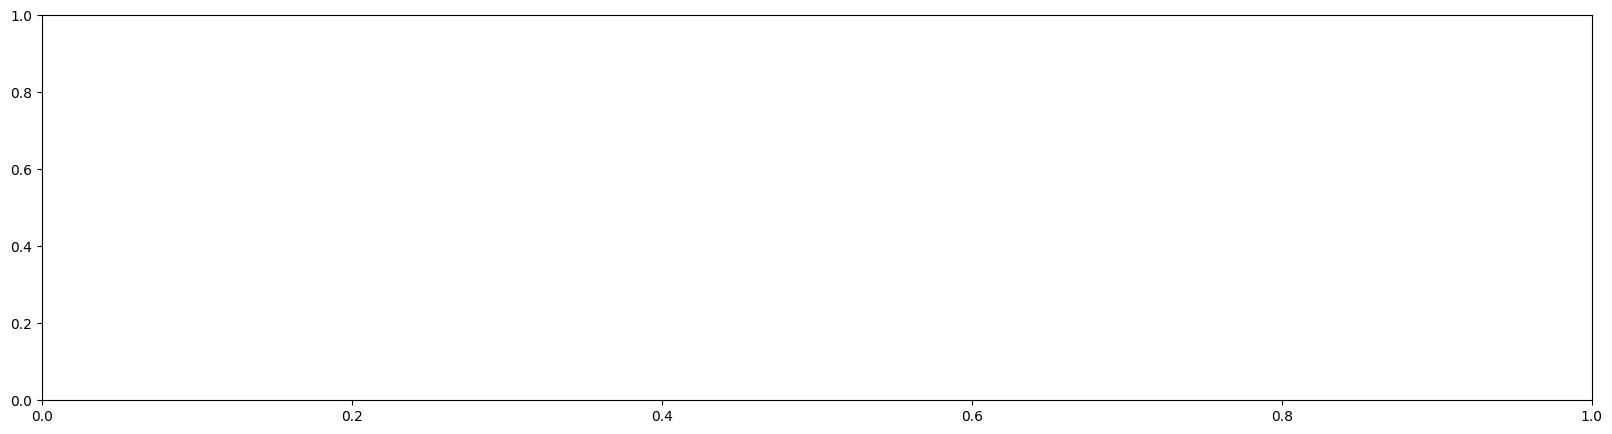

In [73]:
# I made a function out of this since I will use it again later on 
def word_frequency_barplot(df, nr_top_words=50):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    sns.barplot(x=df.values, y=df.index, alpha=0.8)

    # sns.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words], palette='hls', ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax
    
ax = word_frequency_barplot(tokenized_only_df)
ax.set_title("Word Frequencies", fontsize=16);

## TFIDF TOPIC

In [26]:
#buat dictionary corpus
dic=gensim.corpora.Dictionary(corpus)


In [25]:
#buat dictionary corpus
print(dic)

Dictionary<7808 unique tokens: ['chonburipools', 'coba', 'com', 'gibran', 'hasilresultjogjatoto']...>


In [27]:
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [28]:
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (25, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (26, 1), (27, 1), (28, 1)], [(29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46,

In [30]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)

In [31]:
lda_model.show_topics()

[(0,
  '0.075*"ganjar" + 0.049*"mahfud" + 0.026*"ganjarmahfud" + 0.023*"ganjarpranowo" + 0.020*"dukung" + 0.018*"pranowo" + 0.014*"ganjarpresiden" + 0.013*"mahfudmd" + 0.011*"sahabatganjar" + 0.009*"presiden"'),
 (1,
  '0.043*"ganjar" + 0.031*"mahfud" + 0.014*"indonesia" + 0.011*"mahfudmd" + 0.010*"jogjatoto" + 0.010*"gibran" + 0.010*"ganjarpranowo" + 0.010*"pranowo" + 0.009*"com" + 0.008*"ganjarmahfud"'),
 (2,
  '0.062*"prabowo" + 0.042*"gibran" + 0.025*"anies" + 0.016*"ganjar" + 0.015*"mahfud" + 0.015*"subianto" + 0.013*"bersamaindonesiamaju" + 0.012*"pilpres" + 0.012*"muhaimin" + 0.011*"prabowogibranistimewa"'),
 (3,
  '0.065*"anies" + 0.037*"muhaimin" + 0.023*"survei" + 0.020*"cakimin" + 0.018*"amin" + 0.016*"com" + 0.015*"imin" + 0.014*"iskandar" + 0.012*"unggul" + 0.011*"muak"')]

In [45]:
# g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
# plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
# plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

## Visualize the Topic

In [32]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.192311 -0.113585       1        1  31.764995
2      0.108577  0.035397       2        1  28.098860
3      0.180743 -0.065174       3        1  24.955916
1     -0.097009  0.143362       4        1  15.180229, topic_info=             Term         Freq        Total Category  logprob  loglift
52          anies  2183.000000  2183.000000  Default  30.0000  30.0000
16        prabowo  1963.000000  1963.000000  Default  29.0000  29.0000
67         ganjar  3410.000000  3410.000000  Default  28.0000  28.0000
39       muhaimin  1168.000000  1168.000000  Default  27.0000  27.0000
68   ganjarmahfud   895.000000   895.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
218           pdi    53.248334   101.633763   Topic4  -5.5787   1.2388
178        jokowi    64.982746   536.322553   Topic4  -5.3796  -0.2254
198         pilih    61.470963   423.231118   Topic4  -5.4352  -0.0442
84        pilpres    63.167023   775.932611   Topic4  -5.4079  -0.6231
448        partai    56.333929   348.282430   Topic4  -5.5224   0.0635

[277 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
5522      1  0.976055  akurelawanprabowogibran
4632      4  0.972489               alamganjar
1664      3  0.937199                    alias
51        2  0.104039                     amin
51        3  0.890831                     amin
...     ...       ...                      ...
109       3  0.413925                    wakil
109       4  0.345811                    wakil
673       1  0.434446                    warga
673       3  0.085186                    warga
673       4  0.477039                    warga

[417 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

## WORDCLOUD GENERATION

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


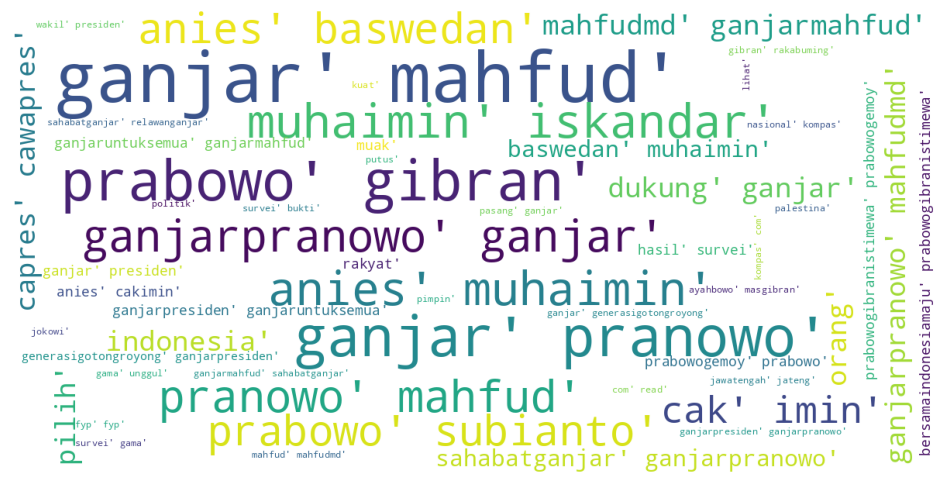

In [37]:
show_wordcloud(corpus)